In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("/content/sample_data/100000 BT Records.csv")

In [55]:
df.columns

Index(['Date', 'Description', 'Deposits', 'Withdrawls', 'Balance'], dtype='object')

In [56]:
df.head()

,Date,Description,Deposits,Withdrawls,Balance
0,20-Aug-2020,Interest,00.00,"4,893.98","39,151.80"
1,20-Aug-2020,Debit Card,00.00,"5,593.11","33,558.69"
2,20-Aug-2020,Reversal,00.00,"8,389.67","25,169.02"
3,20-Aug-2020,Reversal,343.29,00.00,"25,512.31"
4,21-Aug-2020,RTGS,00.00,"4,252.05","21,260.26"


In [57]:
df.tail()

,Date,Description,Deposits,Withdrawls,Balance
99995,12-May-2031,ATM,00.00,"89,509.00",00.00
99996,12-May-2031,Transfer,419.00,00.00,419.00
99997,12-May-2031,Cheque,34.00,00.00,453.00
99998,12-May-2031,RTGS,"150,370.20",00.00,"150,823.20"
99999,12-May-2031,ATM,"13,261.80",00.00,"164,085.00"


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         100000 non-null  object
 1   Description  100000 non-null  object
 2   Deposits     100000 non-null  object
 3   Withdrawls   100000 non-null  object
 4   Balance      100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [59]:
df.describe()

,Date,Description,Deposits,Withdrawls,Balance
count,100000,100000,100000,100000,100000
unique,3918,15,35244,44639,93310
top,19-Oct-2027,IMPS,00.00,00.00,00.00
freq,238,6922,47791,52426,4652


### Checking for missing values

In [60]:
df.isnull().sum()

,0
Date,0
Description,0
Deposits,0
Withdrawls,0
Balance,0


In [61]:
df.dtypes

,0
Date,object
Description,object
Deposits,object
Withdrawls,object
Balance,object


### Adding new columns

In [62]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [63]:
# Converting numeric columns to appropriate numeric data types for plotting
df['Withdrawls'] = pd.to_numeric(df['Withdrawls'].str.replace(',', ''), errors='coerce')  
df['Deposits'] = pd.to_numeric(df['Deposits'].str.replace(',', ''), errors='coerce')     
df['Balance'] = pd.to_numeric(df['Balance'].str.replace(',', ''), errors='coerce')

In [64]:
# Convert these columns to integers
df['Withdrawls'] = df['Withdrawls'].fillna(0).astype(int)  
df['Deposits'] = df['Deposits'].fillna(0).astype(int)      
df['Balance'] = df['Balance'].fillna(0).astype(int)

In [65]:
print(f"NaN values in Withdrawls: {df['Withdrawls'].isna().sum()}")
print(f"NaN values in Deposits: {df['Deposits'].isna().sum()}")
print(f"NaN values in Balance: {df['Balance'].isna().sum()}")

NaN values in Withdrawls: 0
NaN values in Deposits: 0
NaN values in Balance: 0


In [66]:
df


,Date,Description,Deposits,Withdrawls,Balance
0,2020-08-20,Interest,0,4893,39151
1,2020-08-20,Debit Card,0,5593,33558
2,2020-08-20,Reversal,0,8389,25169
3,2020-08-20,Reversal,343,0,25512
4,2020-08-21,RTGS,0,4252,21260
...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0
99996,2031-05-12,Transfer,419,0,419
99997,2031-05-12,Cheque,34,0,453
99998,2031-05-12,RTGS,150370,0,150823


In [67]:
# Add features
df['Transaction_Type'] = df.apply(lambda x: 'Deposit' if x['Deposits'] > 0 else 'Withdrawal', axis=1)
df['Transaction_Amount'] = df['Deposits'] - df['Withdrawls']
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [68]:
df

,Date,Description,Deposits,Withdrawls,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek
0,2020-08-20,Interest,0,4893,39151,Withdrawal,-4893,8,3
1,2020-08-20,Debit Card,0,5593,33558,Withdrawal,-5593,8,3
2,2020-08-20,Reversal,0,8389,25169,Withdrawal,-8389,8,3
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,3
4,2020-08-21,RTGS,0,4252,21260,Withdrawal,-4252,8,4
...,...,...,...,...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0,Withdrawal,-89509,5,0
99996,2031-05-12,Transfer,419,0,419,Deposit,419,5,0
99997,2031-05-12,Cheque,34,0,453,Deposit,34,5,0
99998,2031-05-12,RTGS,150370,0,150823,Deposit,150370,5,0


### 1.2 Temporal Analysis
Analyze transactions over time
Identify trends in deposits, withdrawals, and balances.
Determine seasonal patterns.

In [69]:
# Monthly trends
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('YearMonth').agg({
    'Deposits': 'sum',
    'Withdrawls': 'sum',
    'Balance': 'mean'
})

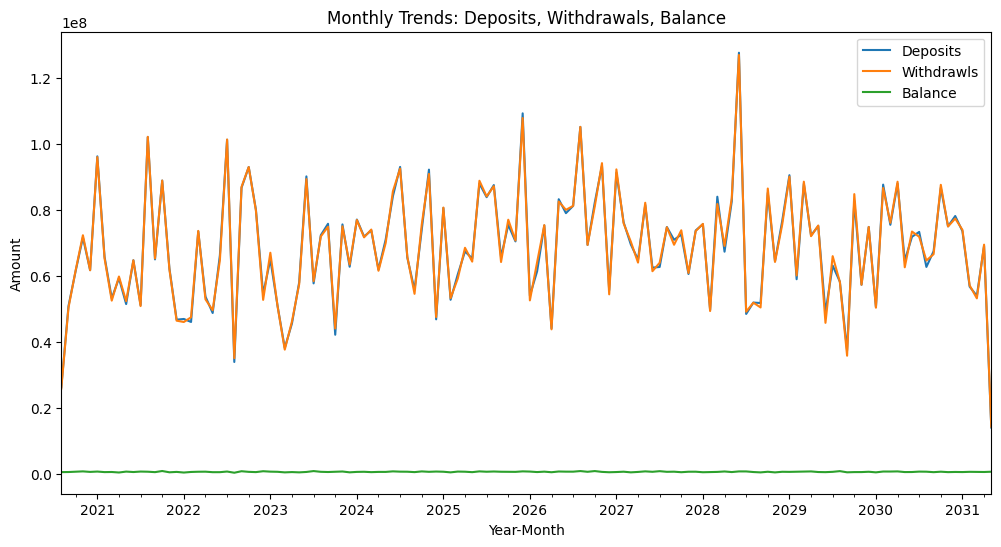

In [70]:
# Plot trends
import matplotlib.pyplot as plt

monthly_summary.plot(kind='line', figsize=(12, 6), title="Monthly Trends: Deposits, Withdrawals, Balance")
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.show()

### 1.3 Spending Patterns
Spending categories
Examine transaction patterns by grouping descriptions.

In [71]:
top_descriptions = df['Description'].value_counts().head(10)
print("Top 10 Transaction Descriptions:")
print(top_descriptions)

Top 10 Transaction Descriptions:
Description
IMPS             6922
Tax              6766
Miscellaneous    6760
Purchase         6717
ATM              6701
Cash             6677
Interest         6677
Reversal         6638
Bill             6623
Transfer         6606
Name: count, dtype: int64


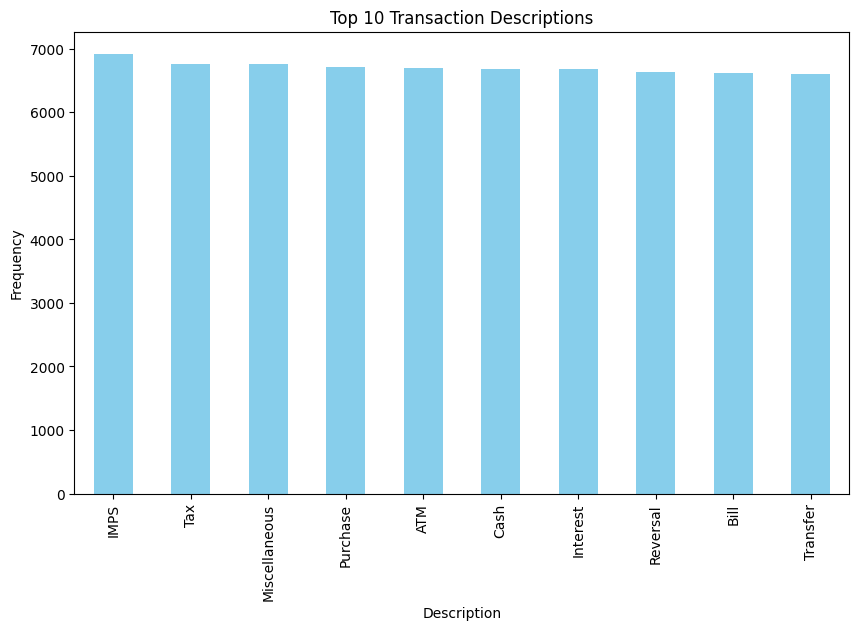

In [72]:
# Visualize
top_descriptions.plot(kind='bar', color='skyblue', figsize=(10, 6), title="Top 10 Transaction Descriptions")
plt.xlabel("Description")
plt.ylabel("Frequency")
plt.show()

Withdrawals by day of the week
Analyze weekly spending behavior.

In [73]:
df['DayOfWeek'] = df['Date'].dt.day_name()
weekly_spending = df.groupby('DayOfWeek')['Withdrawls'].sum()

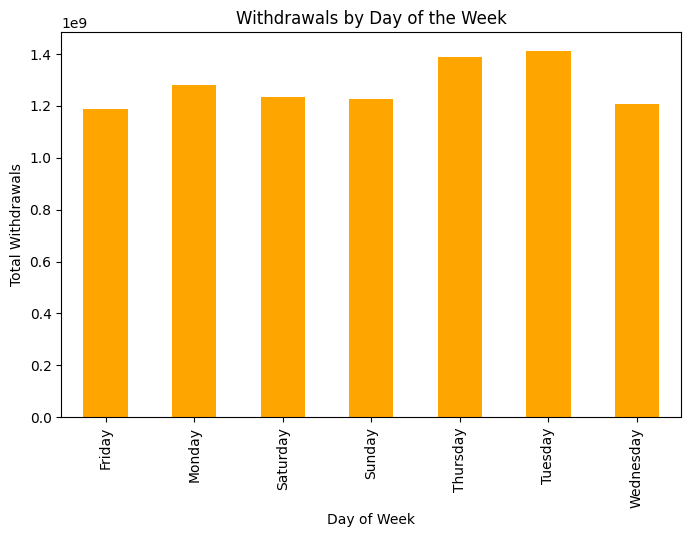

In [74]:
# Visualize
weekly_spending.plot(kind='bar', color='orange', figsize=(8, 5), title="Withdrawals by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Withdrawals")
plt.show()

### 1.4 Outlier Detection
Boxplot for outlier identification
Identify unusual deposits and withdrawals.

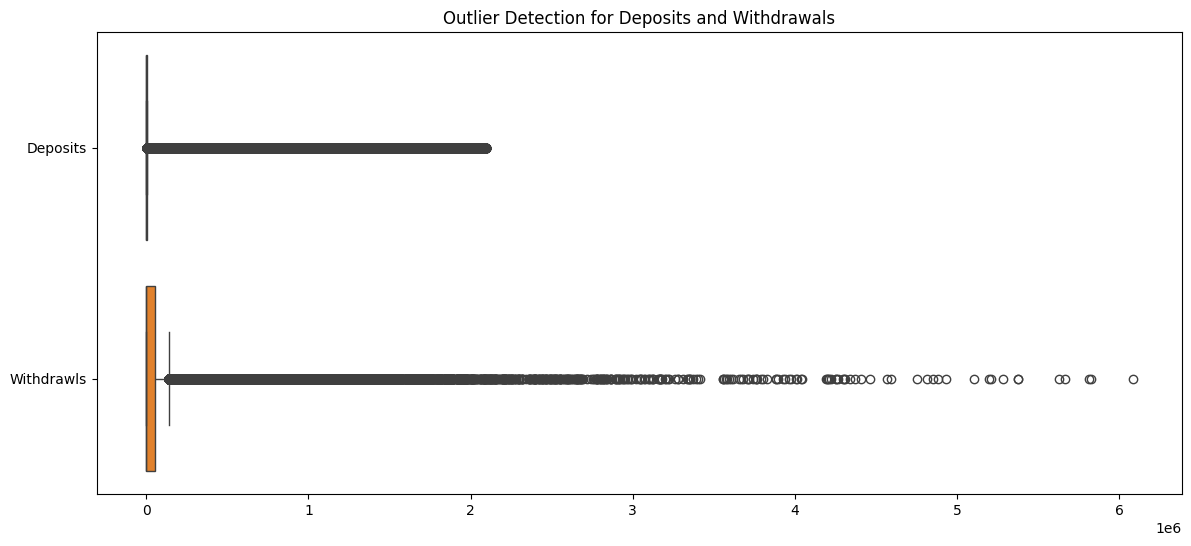

In [75]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['Deposits', 'Withdrawls']], orient='h')
plt.title("Outlier Detection for Deposits and Withdrawals")
plt.show()

### Anomalous transactions
Analyze outliers beyond 1.5x the interquartile range (IQR).

In [76]:
q1_withdrawls = df['Withdrawls'].quantile(0.25)
q3_withdrawls = df['Withdrawls'].quantile(0.75)
iqr_withdrawls = q3_withdrawls - q1_withdrawls

In [77]:
outliers = df[df['Withdrawls'] > (q3_withdrawls + 1.5 * iqr_withdrawls)]
print("Outliers in Withdrawls:")
print(outliers)

Outliers in Withdrawls:
            Date Description  Deposits  Withdrawls  Balance Transaction_Type  \
28    2020-08-21         ATM         0      174730        0       Withdrawal   
35    2020-08-21        Cash         0      508314  1524942       Withdrawal   
36    2020-08-21    Reversal         0      190617  1334324       Withdrawal   
37    2020-08-21        RTGS         0      444774   889549       Withdrawal   
39    2020-08-21        Bill         0      177922   711689       Withdrawal   
...          ...         ...       ...         ...      ...              ...   
99963 2031-05-08    Reversal         0      594372  2971860       Withdrawal   
99964 2031-05-08        Cash         0     2971860        0       Withdrawal   
99973 2031-05-08    Purchase         0     1416746        0       Withdrawal   
99984 2031-05-10  Commission         0      430581   430581       Withdrawal   
99985 2031-05-10        IMPS         0      215290   215290       Withdrawal   

       Transact

### 1.5 Correlation Analysis
Heatmap for numeric features
Examine relationships between deposits, withdrawals, and balances.

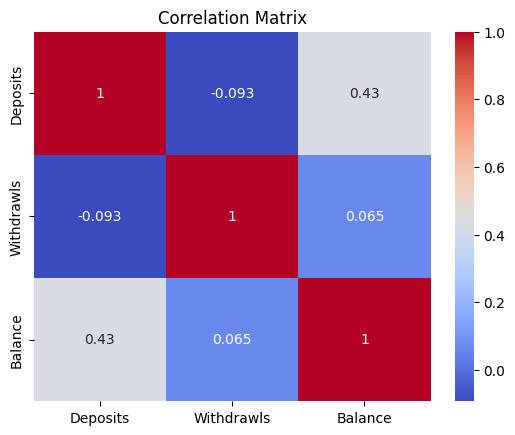

In [78]:
correlation_matrix = df[['Deposits', 'Withdrawls', 'Balance']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 2. Advanced Feature Engineering

### 2.1 Transaction Amount
Create a unified column for transaction amounts.

In [79]:
df['Transaction_Amount'] = df['Deposits'] - df['Withdrawls']

### 2.2 Transaction Type
Label each transaction as a Deposit or Withdrawal.

In [80]:
df['Transaction_Type'] = df.apply(lambda x: 'Deposit' if x['Deposits'] > 0 else 'Withdrawl', axis=1)

### 2.3 Transaction Category
Categorize transactions using NLP on the Description.

Extract keywords using TF-IDF
Identify common patterns in descriptions.

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Description'].fillna(''))

# Display top keywords
tfidf_feature_names = tfidf.get_feature_names_out()
print("Top TF-IDF Features:", tfidf_feature_names[:10])

Top TF-IDF Features: ['atm' 'card' 'cash' 'cheque' 'commission' 'debit' 'imps' 'miscellaneous'
 'neft' 'purchase']


### Categorize using clustering
Cluster transactions into spending categories.

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Spending_Category'] = kmeans.fit_predict(tfidf_matrix)

# Map clusters to meaningful labels
category_map = {0: 'Food', 1: 'Travel', 2: 'Bills', 3: 'Shopping', 4: 'Others'}
df['Spending_Category'] = df['Spending_Category'].map(category_map)

### 2.4 Savings Analysis
Calculate savings per transaction and monthly savings.

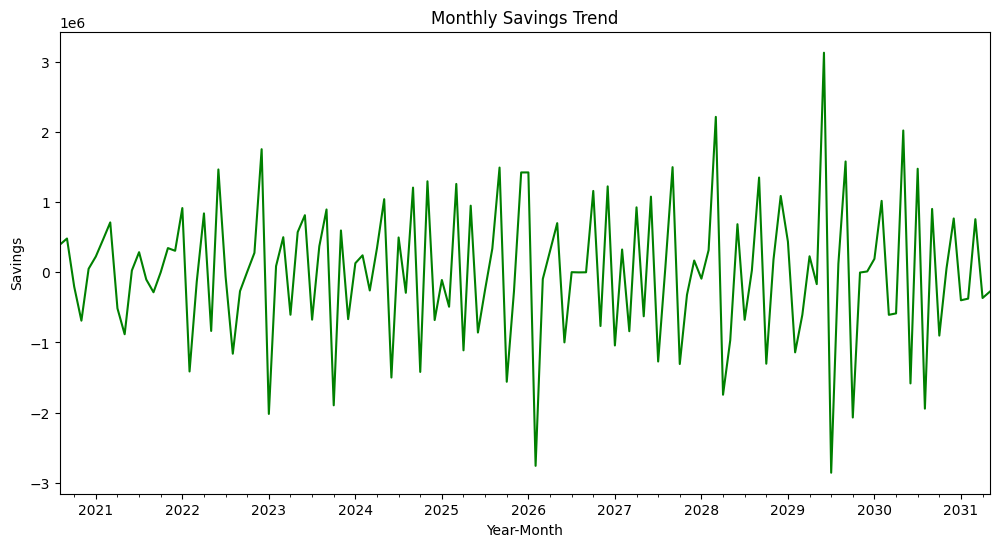

In [83]:
df['Savings'] = df['Deposits'] - df['Withdrawls']
monthly_savings = df.groupby('YearMonth')['Savings'].sum()

# Visualize
monthly_savings.plot(kind='line', figsize=(12, 6), title="Monthly Savings Trend", color='green')
plt.xlabel("Year-Month")
plt.ylabel("Savings")
plt.show()

### 2.8 Rolling Features
Add rolling averages for trends.

In [84]:
df['Rolling_3_Month_Savings'] = df['Savings'].rolling(window=3).mean()
df['Rolling_3_Month_Balance'] = df['Balance'].rolling(window=3).mean()


In [85]:
df

,Date,Description,Deposits,Withdrawls,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth,Spending_Category,Savings,Rolling_3_Month_Savings,Rolling_3_Month_Balance
0,2020-08-20,Interest,0,4893,39151,Withdrawl,-4893,8,Thursday,2020-08,Food,-4893,NaN,NaN
1,2020-08-20,Debit Card,0,5593,33558,Withdrawl,-5593,8,Thursday,2020-08,Food,-5593,NaN,NaN
2,2020-08-20,Reversal,0,8389,25169,Withdrawl,-8389,8,Thursday,2020-08,Food,-8389,-6291.666667,32626.000000
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08,Food,343,-4546.333333,28079.666667
4,2020-08-21,RTGS,0,4252,21260,Withdrawl,-4252,8,Friday,2020-08,Food,-4252,-4099.333333,23980.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0,Withdrawl,-89509,5,Monday,2031-05,Food,-89509,-25878.333333,67131.666667
99996,2031-05-12,Transfer,419,0,419,Deposit,419,5,Monday,2031-05,Others,419,-37155.666667,29976.000000
99997,2031-05-12,Cheque,34,0,453,Deposit,34,5,Monday,2031-05,Food,34,-29685.333333,290.666667
99998,2031-05-12,RTGS,150370,0,150823,Deposit,150370,5,Monday,2031-05,Food,150370,50274.333333,50565.000000


In [86]:
df

,Date,Description,Deposits,Withdrawls,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth,Spending_Category,Savings,Rolling_3_Month_Savings,Rolling_3_Month_Balance
0,2020-08-20,Interest,0,4893,39151,Withdrawl,-4893,8,Thursday,2020-08,Food,-4893,NaN,NaN
1,2020-08-20,Debit Card,0,5593,33558,Withdrawl,-5593,8,Thursday,2020-08,Food,-5593,NaN,NaN
2,2020-08-20,Reversal,0,8389,25169,Withdrawl,-8389,8,Thursday,2020-08,Food,-8389,-6291.666667,32626.000000
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08,Food,343,-4546.333333,28079.666667
4,2020-08-21,RTGS,0,4252,21260,Withdrawl,-4252,8,Friday,2020-08,Food,-4252,-4099.333333,23980.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0,Withdrawl,-89509,5,Monday,2031-05,Food,-89509,-25878.333333,67131.666667
99996,2031-05-12,Transfer,419,0,419,Deposit,419,5,Monday,2031-05,Others,419,-37155.666667,29976.000000
99997,2031-05-12,Cheque,34,0,453,Deposit,34,5,Monday,2031-05,Food,34,-29685.333333,290.666667
99998,2031-05-12,RTGS,150370,0,150823,Deposit,150370,5,Monday,2031-05,Food,150370,50274.333333,50565.000000


In [87]:
df.isna().sum()

,0
Date,0
Description,0
Deposits,0
Withdrawls,0
Balance,0
Transaction_Type,0
Transaction_Amount,0
Month,0
DayOfWeek,0
YearMonth,0


In [88]:
df["Rolling_3_Month_Savings"] = df["Rolling_3_Month_Savings"].fillna(0)
df["Rolling_3_Month_Balance"] = df["Rolling_3_Month_Balance"].fillna(0)

In [89]:
df.isna().sum()

,0
Date,0
Description,0
Deposits,0
Withdrawls,0
Balance,0
Transaction_Type,0
Transaction_Amount,0
Month,0
DayOfWeek,0
YearMonth,0


In [90]:
df

,Date,Description,Deposits,Withdrawls,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth,Spending_Category,Savings,Rolling_3_Month_Savings,Rolling_3_Month_Balance
0,2020-08-20,Interest,0,4893,39151,Withdrawl,-4893,8,Thursday,2020-08,Food,-4893,0.000000,0.000000
1,2020-08-20,Debit Card,0,5593,33558,Withdrawl,-5593,8,Thursday,2020-08,Food,-5593,0.000000,0.000000
2,2020-08-20,Reversal,0,8389,25169,Withdrawl,-8389,8,Thursday,2020-08,Food,-8389,-6291.666667,32626.000000
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08,Food,343,-4546.333333,28079.666667
4,2020-08-21,RTGS,0,4252,21260,Withdrawl,-4252,8,Friday,2020-08,Food,-4252,-4099.333333,23980.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0,Withdrawl,-89509,5,Monday,2031-05,Food,-89509,-25878.333333,67131.666667
99996,2031-05-12,Transfer,419,0,419,Deposit,419,5,Monday,2031-05,Others,419,-37155.666667,29976.000000
99997,2031-05-12,Cheque,34,0,453,Deposit,34,5,Monday,2031-05,Food,34,-29685.333333,290.666667
99998,2031-05-12,RTGS,150370,0,150823,Deposit,150370,5,Monday,2031-05,Food,150370,50274.333333,50565.000000


In [91]:
from sklearn.preprocessing import LabelEncoder
# Create the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'DayOfWeek' column
df['DayOfWeek_Encoded'] = label_encoder.fit_transform(df['DayOfWeek'])

# Display the updated DataFrame
print(df.head())

        Date Description  Deposits  Withdrawls  Balance Transaction_Type  \
0 2020-08-20    Interest         0        4893    39151        Withdrawl   
1 2020-08-20  Debit Card         0        5593    33558        Withdrawl   
2 2020-08-20    Reversal         0        8389    25169        Withdrawl   
3 2020-08-20    Reversal       343           0    25512          Deposit   
4 2020-08-21        RTGS         0        4252    21260        Withdrawl   

   Transaction_Amount  Month DayOfWeek YearMonth Spending_Category  Savings  \
0               -4893      8  Thursday   2020-08              Food    -4893   
1               -5593      8  Thursday   2020-08              Food    -5593   
2               -8389      8  Thursday   2020-08              Food    -8389   
3                 343      8  Thursday   2020-08              Food      343   
4               -4252      8    Friday   2020-08              Food    -4252   

   Rolling_3_Month_Savings  Rolling_3_Month_Balance  DayOfWeek_Encod

In [92]:
label_encoder.classes_

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

df['Spending_Category_Encoded'] = label_encoder.fit_transform(df['Spending_Category'])

df



,Date,Description,Deposits,Withdrawls,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth,Spending_Category,Savings,Rolling_3_Month_Savings,Rolling_3_Month_Balance,DayOfWeek_Encoded,Spending_Category_Encoded
0,2020-08-20,Interest,0,4893,39151,Withdrawl,-4893,8,Thursday,2020-08,Food,-4893,0.000000,0.000000,4,1
1,2020-08-20,Debit Card,0,5593,33558,Withdrawl,-5593,8,Thursday,2020-08,Food,-5593,0.000000,0.000000,4,1
2,2020-08-20,Reversal,0,8389,25169,Withdrawl,-8389,8,Thursday,2020-08,Food,-8389,-6291.666667,32626.000000,4,1
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08,Food,343,-4546.333333,28079.666667,4,1
4,2020-08-21,RTGS,0,4252,21260,Withdrawl,-4252,8,Friday,2020-08,Food,-4252,-4099.333333,23980.333333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2031-05-12,ATM,0,89509,0,Withdrawl,-89509,5,Monday,2031-05,Food,-89509,-25878.333333,67131.666667,1,1
99996,2031-05-12,Transfer,419,0,419,Deposit,419,5,Monday,2031-05,Others,419,-37155.666667,29976.000000,1,2
99997,2031-05-12,Cheque,34,0,453,Deposit,34,5,Monday,2031-05,Food,34,-29685.333333,290.666667,1,1
99998,2031-05-12,RTGS,150370,0,150823,Deposit,150370,5,Monday,2031-05,Food,150370,50274.333333,50565.000000,1,1


In [94]:
label_encoder.classes_

array(['Bills', 'Food', 'Others', 'Shopping', 'Travel'], dtype=object)

### Training Different Models to Predict the category

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Prepare features and target
X = df[['Deposits', 'Withdrawls', 'Balance', 'Month', 'DayOfWeek_Encoded']]
y = df['Spending_Category_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))


Logistic Regression Accuracy: 0.72745
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

  Category 1       0.00      0.00      0.00      1307
  Category 2       0.73      1.00      0.84     14549
  Category 3       0.00      0.00      0.00      1389
  Category 4       0.00      0.00      0.00      1429
  Category 5       0.00      0.00      0.00      1326

    accuracy                           0.73     20000
   macro avg       0.15      0.20      0.17     20000
weighted avg       0.53      0.73      0.61     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

### Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))

Random Forest Classifier Accuracy: 0.6905
Classification Report for Random Forest:
               precision    recall  f1-score   support

  Category 1       0.06      0.01      0.02      1307
  Category 2       0.73      0.94      0.82     14549
  Category 3       0.08      0.02      0.03      1389
  Category 4       0.09      0.02      0.03      1429
  Category 5       0.06      0.01      0.02      1326

    accuracy                           0.69     20000
   macro avg       0.20      0.20      0.18     20000
weighted avg       0.55      0.69      0.60     20000



### Support Vector Machine (SVM)

In [99]:
from sklearn.svm import SVC

# Support Vector Machine
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Classification Report for Support Vector Machine:\n", classification_report(y_test, y_pred_svm, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))


Support Vector Machine Accuracy: 0.72745
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

  Category 1       0.00      0.00      0.00      1307
  Category 2       0.73      1.00      0.84     14549
  Category 3       0.00      0.00      0.00      1389
  Category 4       0.00      0.00      0.00      1429
  Category 5       0.00      0.00      0.00      1326

    accuracy                           0.73     20000
   macro avg       0.15      0.20      0.17     20000
weighted avg       0.53      0.73      0.61     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))


Decision Tree Classifier Accuracy: 0.5293
Classification Report for Decision Tree:
               precision    recall  f1-score   support

  Category 1       0.07      0.08      0.07      1307
  Category 2       0.73      0.70      0.71     14549
  Category 3       0.06      0.06      0.06      1389
  Category 4       0.07      0.08      0.08      1429
  Category 5       0.06      0.07      0.07      1326

    accuracy                           0.53     20000
   macro avg       0.20      0.20      0.20     20000
weighted avg       0.55      0.53      0.54     20000



### K-Nearest Neighbors (KNN)

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Classification Report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))


K-Nearest Neighbors Accuracy: 0.70015
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

  Category 1       0.06      0.02      0.03      1307
  Category 2       0.73      0.96      0.83     14549
  Category 3       0.07      0.01      0.01      1389
  Category 4       0.05      0.00      0.01      1429
  Category 5       0.06      0.01      0.01      1326

    accuracy                           0.70     20000
   macro avg       0.19      0.20      0.18     20000
weighted avg       0.55      0.70      0.61     20000



### Gradient Boosting Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=123456)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb, target_names=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']))


Gradient Boosting Classifier Accuracy: 0.7274
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

  Category 1       0.00      0.00      0.00      1307
  Category 2       0.73      1.00      0.84     14549
  Category 3       0.00      0.00      0.00      1389
  Category 4       0.00      0.00      0.00      1429
  Category 5       0.00      0.00      0.00      1326

    accuracy                           0.73     20000
   macro avg       0.15      0.20      0.17     20000
weighted avg       0.53      0.73      0.61     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [105]:
import pickle
with open("svc_model.pkl", "wb") as file:
    pickle.dump(model_svm, file)
print("Model saved successfully.")

Model saved successfully.
